In [1]:
import pandas as pd

In [2]:
m = pd.read_csv("mismatched_labels.csv")

In [3]:
m.columns = ["desc", "cat", "subcat", "group", "samples", "mismatched", "ratio"]

In [4]:
mu = m["cat"].unique()

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

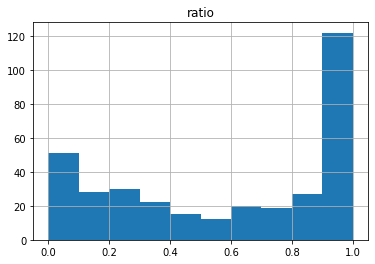

In [5]:
m.hist("ratio")

In [6]:
import numpy as np
bins = list(np.arange(11)/10)
bins

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [7]:
labels = np.arange(1,11)
labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
m["bin"] = pd.cut(m["ratio"], bins=bins, labels=labels)

In [9]:
n = m[["cat", "bin"]].groupby(["cat", "bin"]).size().to_frame("count").reset_index()

In [10]:
n[n["bin"] == 10].sum()

cat      999AMNAMWBSVBVGCAPCCCCMDCNSCOMANDPSFACFDSINDIR...
count                                                  122
dtype: object

In [11]:
m.head()

,desc,cat,subcat,group,samples,mismatched,ratio,bin
0,NaN,BSV,658.0,2.0,800,800,1.0,10
1,NaN,AMW,632.0,1.0,800,800,1.0,10
2,NaN,AMN,605.0,6.0,800,800,1.0,10
3,Raw materials,RWM,209.0,1.0,800,800,1.0,10
4,NaN,FAC,702.0,1.0,800,800,1.0,10


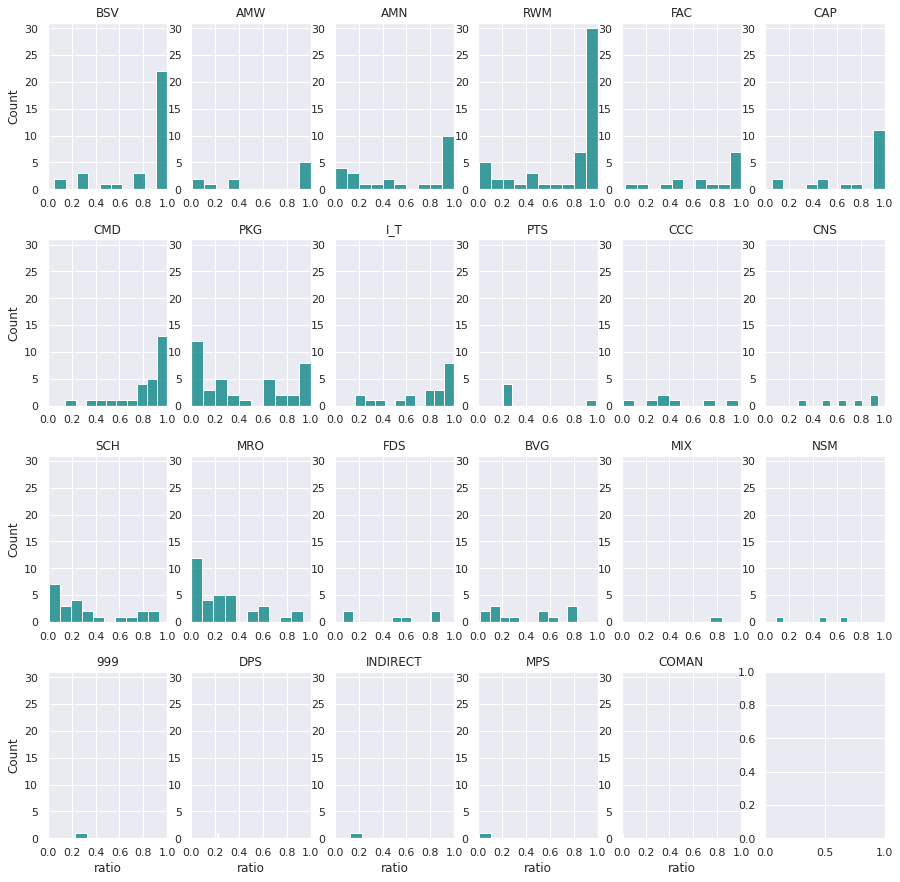

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

fig, axs = plt.subplots(4, 6, figsize=(15, 15))
plt.subplots_adjust(hspace=0.3)

x, y, i = 0, 0, 0

for _ in range(4):
    for _ in range(6):
        y = y % 6
        ax = sns.histplot(m[m["cat"] == mu[i]], x="ratio", color="teal", ax=axs[x, y], bins=10)
        ax.set(title=mu[i], xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ylim=[0, 31], xlim=[0.0, 1.0])
        if y > 0:
            ax.set(ylabel="")
        if x < 3:
            ax.set(xlabel="")
        i += 1
        y += 1
        if i > 22:
            break
    x += 1
    
plt.show()

<AxesSubplot:xlabel='ratio', ylabel='cat'>

<Figure size 432x288 with 0 Axes>

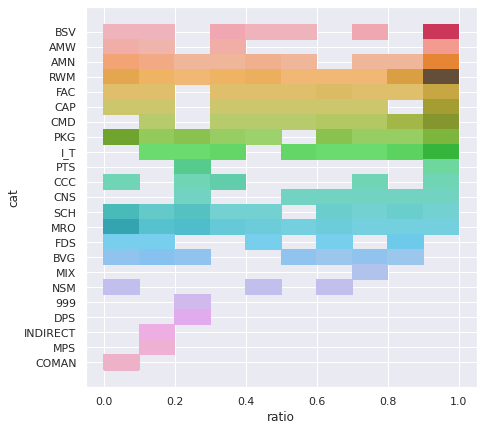

In [13]:
plt.clf()
plt.figure(figsize=(7, 7))
sns.histplot(
    m, x="ratio", y="cat", hue="cat", legend=False
)